In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Carichiamo il dataset Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizziamo i valori dei pixel (0-255 → 0-1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Suddividiamo in training e validation set
X_valid, X_train = X_train_full[:6000], X_train_full[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# Controllo dimensioni
X_train.shape, X_valid.shape, X_test.shape

2025-10-23 14:13:06.462663: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-23 14:13:06.491171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-23 14:13:09.547531: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


((54000, 28, 28), (6000, 28, 28), (10000, 28, 28))

In [2]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),   # da 28x28 → 784
    keras.layers.Dense(300, activation="relu"),   # 1° hidden layer
    keras.layers.Dense(100, activation="relu"),   # 2° hidden layer
    keras.layers.Dense(10, activation="softmax")  # output layer (10 classi)
])

model.summary()


/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1761221592.429092  341375 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)


In [4]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)


Epoch 1/30


2025-10-23 14:13:13.094719: I external/local_xla/xla/service/service.cc:163] XLA service 0x798bb0016640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-23 14:13:13.094729: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-10-23 14:13:13.100804: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-23 14:13:13.123976: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-10-23 14:13:13.133093: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:13:13.133122: I e

 268/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5122 - loss: 1.6138

I0000 00:00:1761221594.751390  341517 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7639 - loss: 0.7163 - val_accuracy: 0.8173 - val_loss: 0.5350
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.8294 - loss: 0.4895 - val_accuracy: 0.8323 - val_loss: 0.4759
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - accuracy: 0.8446 - loss: 0.4435 - val_accuracy: 0.8492 - val_loss: 0.4310
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8548 - loss: 0.4163 - val_accuracy: 0.8560 - val_loss: 0.4164
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8616 - loss: 0.3973 - val_accuracy: 0.8462 - val_loss: 0.4333
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.8661 - loss: 0.3811 - val_accuracy: 0.8640 - val_loss: 0.3945
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.8703 - loss: 0.3675 - val_accuracy: 0.8712 - val_loss: 0.3663
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.8735 - loss: 0.3556

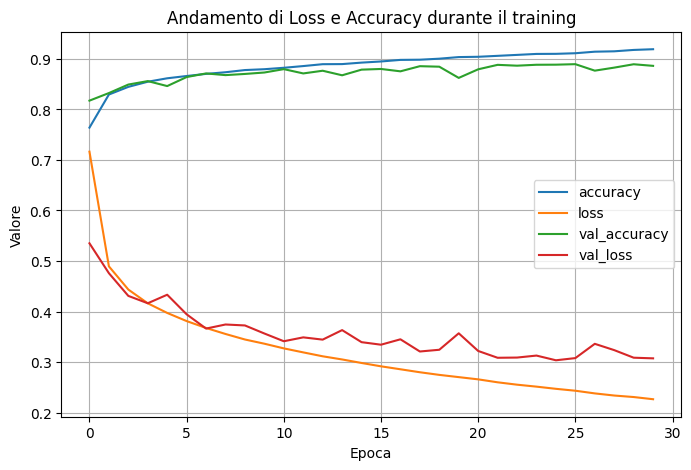

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertiamo i risultati in un DataFrame per comodità
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("Epoca")
plt.ylabel("Valore")
plt.title("Andamento di Loss e Accuracy durante il training")
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


109/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.8844 - loss: 0.3239

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8828 - loss: 0.3356
Test accuracy: 0.8828


In [7]:
from tensorflow import keras

# Ricompiliamo il modello esistente con Adam
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

history_adam = model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_valid, y_valid)
)


Epoch 1/15


2025-10-23 14:13:45.010057: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:13:45.010076: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:13:45.320710: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_287', 8 bytes spill stores, 8 bytes spill loads

2025-10-23 14:13:45.332567: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Re

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8616 - loss: 0.3782 - val_accuracy: 0.8693 - val_loss: 0.3440
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.8782 - loss: 0.3298 - val_accuracy: 0.8725 - val_loss: 0.3490
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.8862 - loss: 0.3064 - val_accuracy: 0.8787 - val_loss: 0.3318
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8922 - loss: 0.2893 - val_accuracy: 0.8870 - val_loss: 0.3128
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.8983 - loss: 0.2733 - val_accuracy: 0.8915 - val_loss: 0.3108
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.9010 - loss: 0.2612 - val_accuracy: 0.8767 - val_loss: 0.3323
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.9062 - loss: 0.2498 - val_accuracy: 0.8882 - val_loss: 0.3040
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9088 - loss: 0.2390

In [8]:
from tensorflow import keras

model_bn_do = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),   # normalizza gli output del layer precedente
    keras.layers.Dropout(0.3),           # disattiva casualmente il 30% dei neuroni

    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation="softmax")
])

model_bn_do.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

history_bn_do = model_bn_do.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)


Epoch 1/30


/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-23 14:14:03.282183: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:14:03.282209: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:14:03.599077: I externa

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7894 - loss: 0.5947 - val_accuracy: 0.8522 - val_loss: 0.4210
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.8277 - loss: 0.4767 - val_accuracy: 0.8603 - val_loss: 0.3844
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.8381 - loss: 0.4515 - val_accuracy: 0.8533 - val_loss: 0.3957
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8435 - loss: 0.4348 - val_accuracy: 0.8608 - val_loss: 0.3817
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8494 - loss: 0.4200 - val_accuracy: 0.8677 - val_loss: 0.3628
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.8501 - loss: 0.4138 - val_accuracy: 0.8723 - val_loss: 0.3612
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.8553 - loss: 0.4012 - val_accuracy: 0.8663 - val_loss: 0.3639
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.8584 - loss: 0.3942

In [9]:
from tensorflow import keras

model_callbacks = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),   # normalizza gli output del layer precedente
    keras.layers.Dropout(0.3),           # disattiva casualmente il 30% dei neuroni

    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation="softmax")
])

model_callbacks.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)


# Definiamo le callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,                  # ferma se la val_loss non migliora per 5 epoche
    restore_best_weights=True    # ripristina i pesi migliori trovati
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",          # file dove salvare il modello migliore
    save_best_only=True
)

# Alleniamo con le callback attive
history_callbacks = model_callbacks.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7905 - loss: 0.5937 - val_accuracy: 0.8508 - val_loss: 0.4207
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8252 - loss: 0.4848 - val_accuracy: 0.8593 - val_loss: 0.3765
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.8379 - loss: 0.4538 - val_accuracy: 0.8565 - val_loss: 0.3857
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8429 - loss: 0.4329 - val_accuracy: 0.8637 - val_loss: 0.3822
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8506 - loss: 0.4172 - val_accuracy: 0.8667 - val_loss: 0.3593
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8543 - loss: 0.4069 - val_accuracy: 0.8632 - val_loss: 0.3640
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8568 - loss: 0.3960 - val_accuracy: 0.8742 - val_loss: 0.3407
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.8617 - l

In [10]:
# Carichiamo il modello migliore salvato
best_model = keras.models.load_model("best_model.keras")

# Valutazione finale sul test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Accuratezza finale sul test set: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8679 - loss: 0.3556
Accuratezza finale sul test set: 0.8679


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


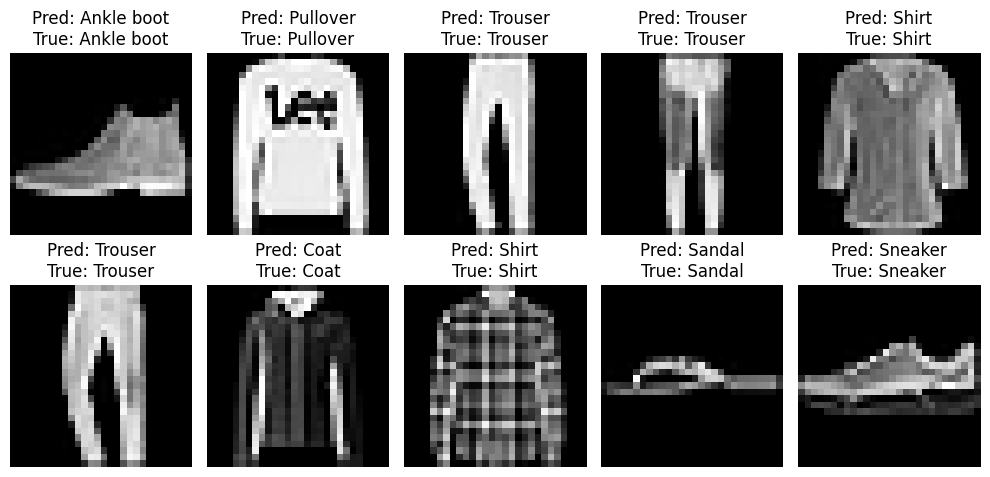

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Facciamo alcune predizioni
y_proba = best_model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)

# Mostriamo le prime 10 immagini con predizione e verità
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


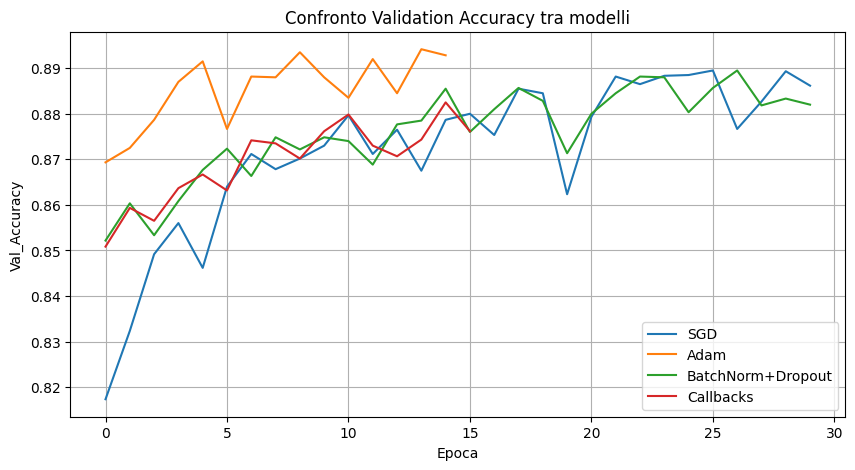

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Creiamo un dizionario con tutte le history
histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history
}

plt.figure(figsize=(10,5))

# Confrontiamo l'andamento della validation accuracy
for name, hist in histories.items():
    plt.plot(hist["val_accuracy"], label=f"{name}")

plt.title("Confronto Validation Accuracy tra modelli")
plt.xlabel("Epoca")
plt.ylabel("Val_Accuracy")
plt.grid(True)
plt.legend()
plt.show()


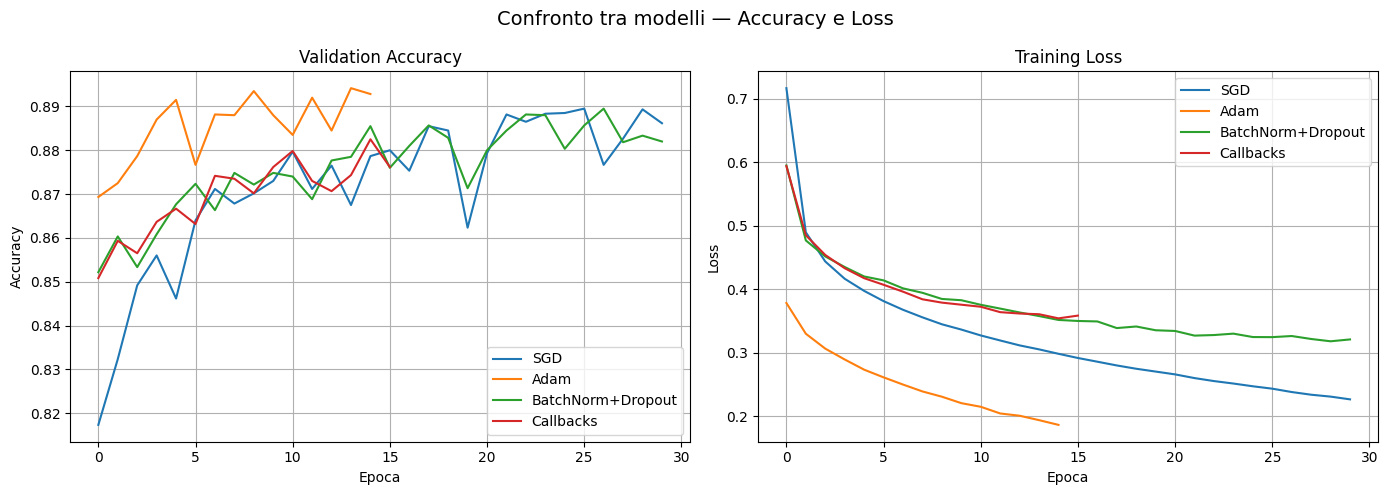

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Dizionario con tutte le history
histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history
}

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# ---- 1️⃣ Validation Accuracy ----
for name, hist in histories.items():
    axes[0].plot(hist["val_accuracy"], label=name)
axes[0].set_title("Validation Accuracy")
axes[0].set_xlabel("Epoca")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True)
axes[0].legend()

# ---- 2️⃣ Training Loss ----
for name, hist in histories.items():
    axes[1].plot(hist["loss"], label=name)
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epoca")
axes[1].set_ylabel("Loss")
axes[1].grid(True)
axes[1].legend()

plt.suptitle("Confronto tra modelli — Accuracy e Loss", fontsize=14)
plt.tight_layout()
plt.show()


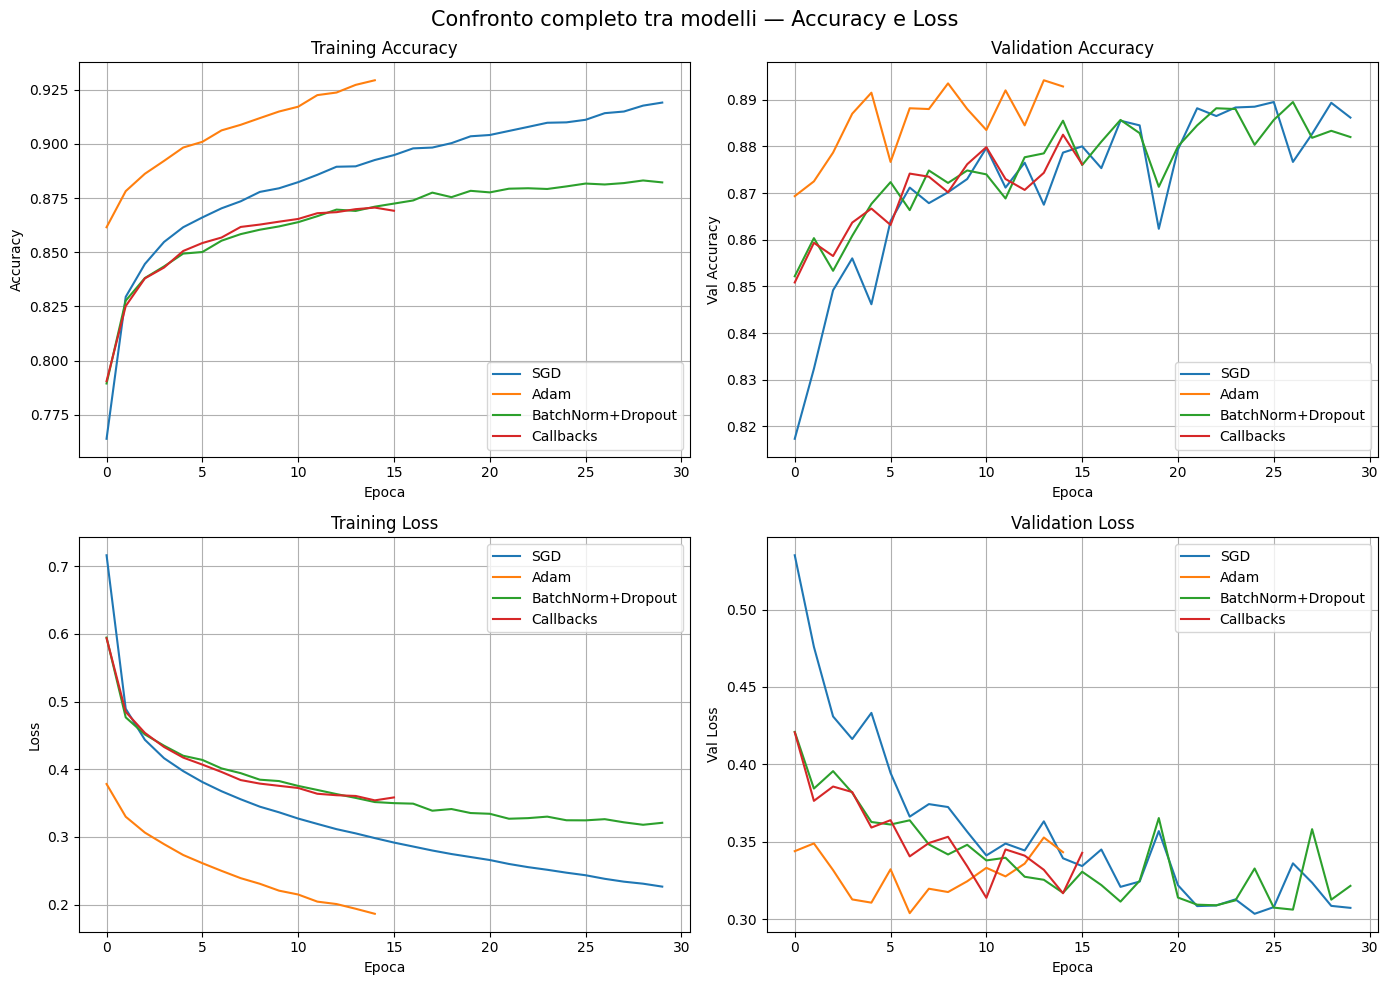

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Raccolta di tutte le history
histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto completo tra modelli — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()


In [15]:
from tensorflow import keras

model_power = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(500, activation="relu"),
    keras.layers.BatchNormalization(),   # normalizza gli output del layer precedente
    keras.layers.Dropout(0.3),           # disattiva casualmente il 30% dei neuroni

    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),   # normalizza gli output del layer precedente
    keras.layers.Dropout(0.3),           # disattiva casualmente il 30% dei neuroni

    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(10, activation="softmax")
])

model_power.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)


# Definiamo le callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,                  # ferma se la val_loss non migliora per 5 epoche
    restore_best_weights=True    # ripristina i pesi migliori trovati
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",          # file dove salvare il modello migliore
    save_best_only=True
)

# Alleniamo con le callback attive
history_power = model_power.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50


2025-10-23 14:15:04.588772: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:15:04.588794: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:15:04.930800: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2110', 44 bytes spill stores, 44 bytes spill loads

2025-10-23 14:15:04.955085: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7213 - loss: 0.8187 - val_accuracy: 0.8467 - val_loss: 0.4288
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8089 - loss: 0.5520 - val_accuracy: 0.8635 - val_loss: 0.3789
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8263 - loss: 0.4896 - val_accuracy: 0.8700 - val_loss: 0.3601
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.8418 - loss: 0.4486 - val_accuracy: 0.8767 - val_loss: 0.3390
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.8478 - loss: 0.4260 - val_accuracy: 0.8773 - val_loss: 0.3342
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.8552 - loss: 0.4032 - val_accuracy: 0.8798 - val_loss: 0.3274
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8609 - loss: 0.3921 - val_accuracy: 0.8812 - val_loss: 0.3148
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8657 - loss: 0.3724

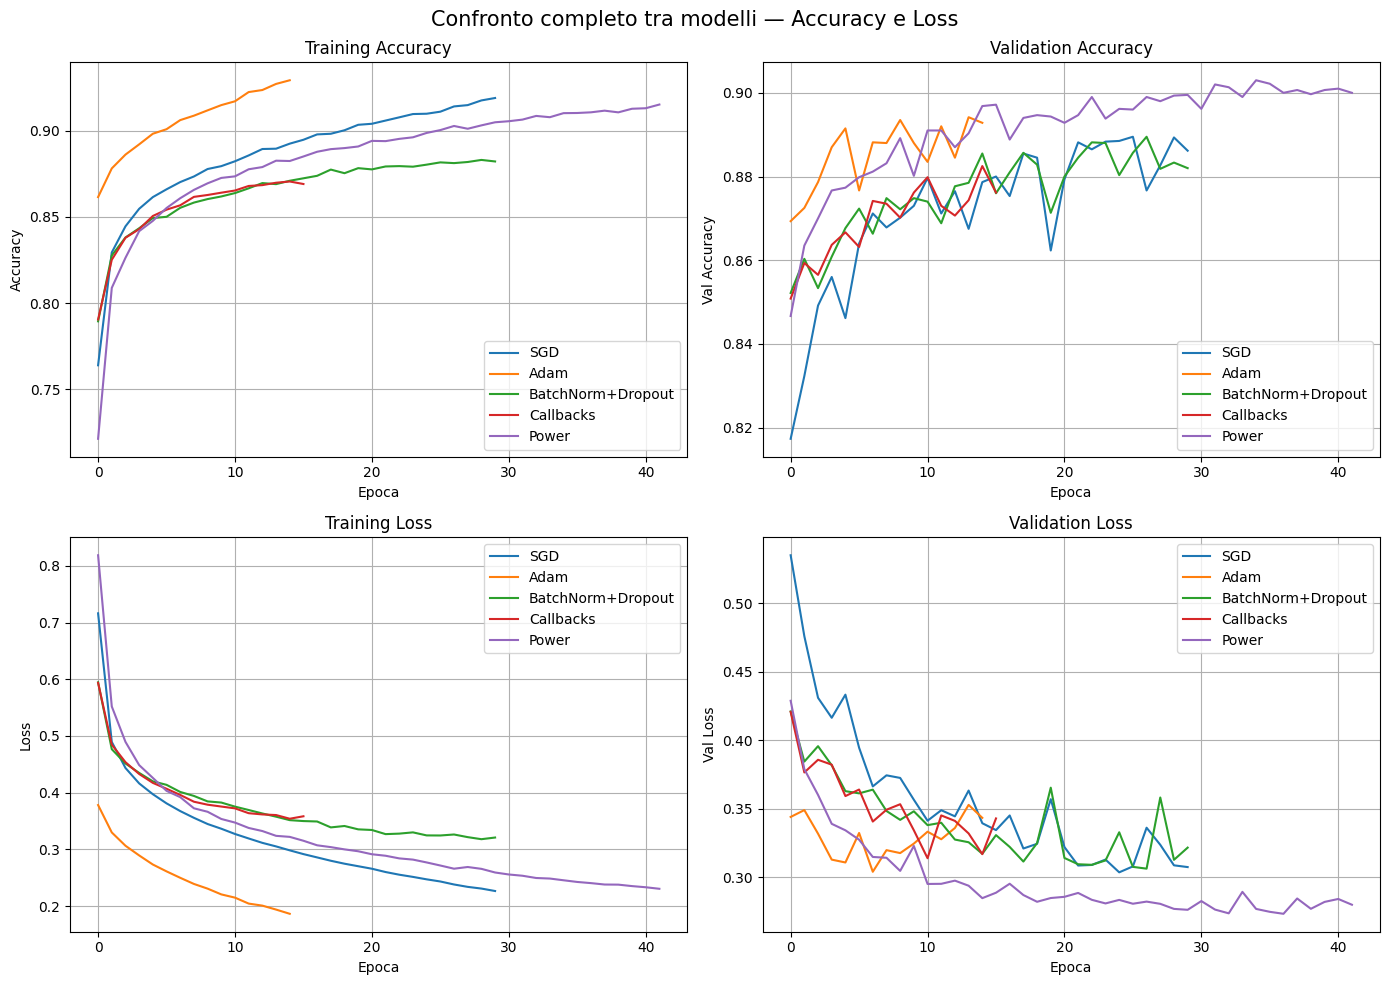

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Raccolta di tutte le history
Histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history,
    "Power": history_power.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto completo tra modelli — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [17]:
# Carichiamo il modello salvato con i pesi migliori
best_power = keras.models.load_model("best_model.keras")

# Valutiamo sul test set
test_loss, test_acc = best_power.evaluate(X_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3147
Loss sul test set: 0.3147
Accuratezza sul test set: 0.8897


In [18]:
from tensorflow import keras

def block1(units=500):
    block=keras.models.Sequential([
    keras.layers.Dense(300,kernel_regularizer=keras.regularizers.l2(1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.Dropout(0.25)

    ])

    return block

model_1=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),

    block1(500),
    block1(300),
    block1(100),

    keras.layers.Dense(10, activation="softmax", )

])

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)


early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)


# Alleniamo con le callback attive
history_model_1 = model_1.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50


/vol/home/s4949404/miniconda3/envs/IDL/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
2025-10-23 14:16:06.314264: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:16:06.618418: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2237', 4 bytes spill stores, 4 bytes spill loads

2025-10-23 14:16:06.618447: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2237', 8 bytes spill stores, 8 bytes spill load

769/844 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.6273 - loss: 1.1912

2025-10-23 14:16:08.487664: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:16:08.487688: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-23 14:16:08.828473: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2237', 4 bytes spill stores, 4 bytes spill loads

2025-10-23 14:16:08.829689: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7399 - loss: 0.8512 - val_accuracy: 0.8437 - val_loss: 0.5360
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8235 - loss: 0.6010 - val_accuracy: 0.8620 - val_loss: 0.4837
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8408 - loss: 0.5459 - val_accuracy: 0.8727 - val_loss: 0.4562
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - accuracy: 0.8505 - loss: 0.5146 - val_accuracy: 0.8755 - val_loss: 0.4422
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.8588 - loss: 0.4905 - val_accuracy: 0.8802 - val_loss: 0.4297
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8654 - loss: 0.4695 - val_accuracy: 0.8820 - val_loss: 0.4228
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.8717 - loss: 0.4520 - val_accuracy: 0.8792 - val_loss: 0.4167
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8743 - loss: 0.4405 - val_accuracy:

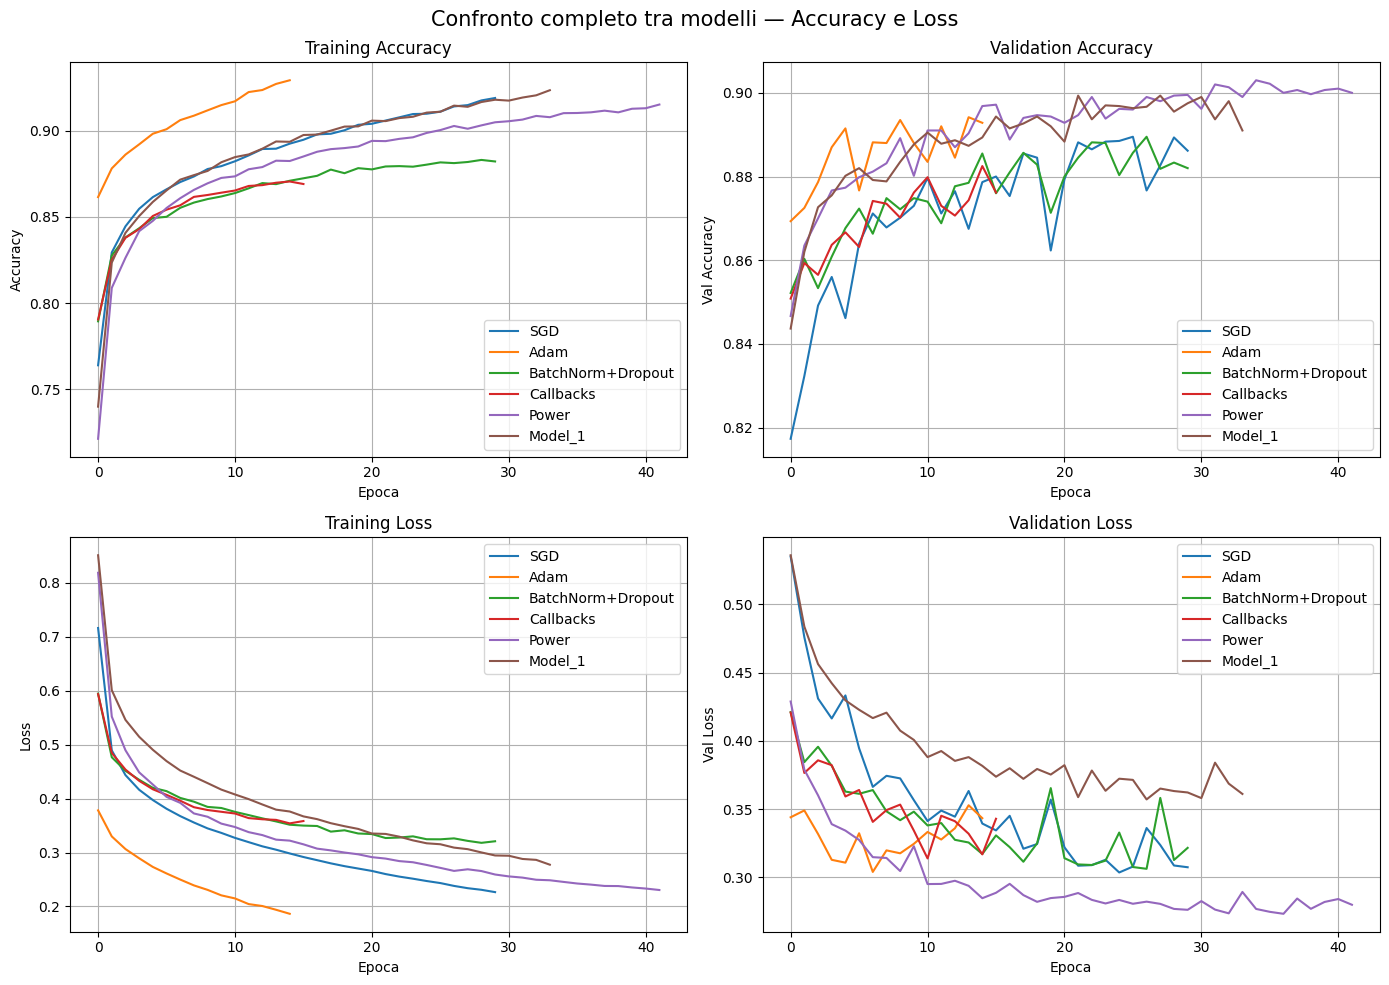

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Raccolta di tutte le history
Histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history,
    "Power": history_power.history,
    "Model_1" : history_model_1.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto completo tra modelli — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [20]:
# Carichiamo il modello salvato con i pesi migliori
best_power = keras.models.load_model("best_model.keras")

# Valutiamo sul test set
test_loss, test_acc = best_power.evaluate(X_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")

260/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8911 - loss: 0.3824

2025-10-23 14:16:35.971042: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 8 bytes spill stores, 8 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8903 - loss: 0.3845
Loss sul test set: 0.3845
Accuratezza sul test set: 0.8903


In [21]:
from tensorflow import keras

model_2=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),

    block1(500),
    block1(300),
    block1(100),

    keras.layers.Dense(10, activation="softmax", )

])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.AdamW(learning_rate=1e-4,weight_decay=1e-4),
    metrics=["accuracy"]
)


early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)


# Alleniamo con le callback attive
history_model_2 = model_2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7401 - loss: 0.8496 - val_accuracy: 0.8463 - val_loss: 0.5323
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8235 - loss: 0.5980 - val_accuracy: 0.8645 - val_loss: 0.4788
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8399 - loss: 0.5486 - val_accuracy: 0.8740 - val_loss: 0.4532
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8527 - loss: 0.5136 - val_accuracy: 0.8725 - val_loss: 0.4508
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.8584 - loss: 0.4903 - val_accuracy: 0.8777 - val_loss: 0.4317
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.8642 - loss: 0.4718 - val_accuracy: 0.8802 - val_loss: 0.4220
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.8698 - loss: 0.4537 - val_accuracy: 0.8857 - val_loss: 0.4084
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.8738 - loss: 0.4407 - va

In [22]:
# Carichiamo il modello salvato con i pesi migliori
best_power = keras.models.load_model("best_model.keras")

# Valutiamo sul test set
test_loss, test_acc = best_power.evaluate(X_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.3788
Loss sul test set: 0.3788
Accuratezza sul test set: 0.8924


In [23]:
def block2(units=500):
    block=keras.models.Sequential([
    keras.layers.Dense(300,kernel_regularizer=keras.regularizers.l2(1e-4), kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.Dropout(0.25)

    ])
    return block

model_3=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),

    block2(500),
    block2(300),
    block2(100),

    keras.layers.Dense(10, activation="softmax", )

])

model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.AdamW(learning_rate=1e-4,weight_decay=1e-4),
    metrics=["accuracy"]
)


early_stopping=keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model.keras",
    save_best_only=True
)


# Alleniamo con le callback attive
history_model_3 = model_3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7256 - loss: 0.9752 - val_accuracy: 0.8413 - val_loss: 0.6169
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.8127 - loss: 0.6989 - val_accuracy: 0.8597 - val_loss: 0.5678
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.8343 - loss: 0.6350 - val_accuracy: 0.8692 - val_loss: 0.5365
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.8451 - loss: 0.6031 - val_accuracy: 0.8697 - val_loss: 0.5254
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8514 - loss: 0.5766 - val_accuracy: 0.8697 - val_loss: 0.5181
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.8580 - loss: 0.5563 - val_accuracy: 0.8770 - val_loss: 0.5003
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8652 - loss: 0.5382 - val_accuracy: 0.8808 - val_loss: 0.4838
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.8710 - loss: 0.5181 - va

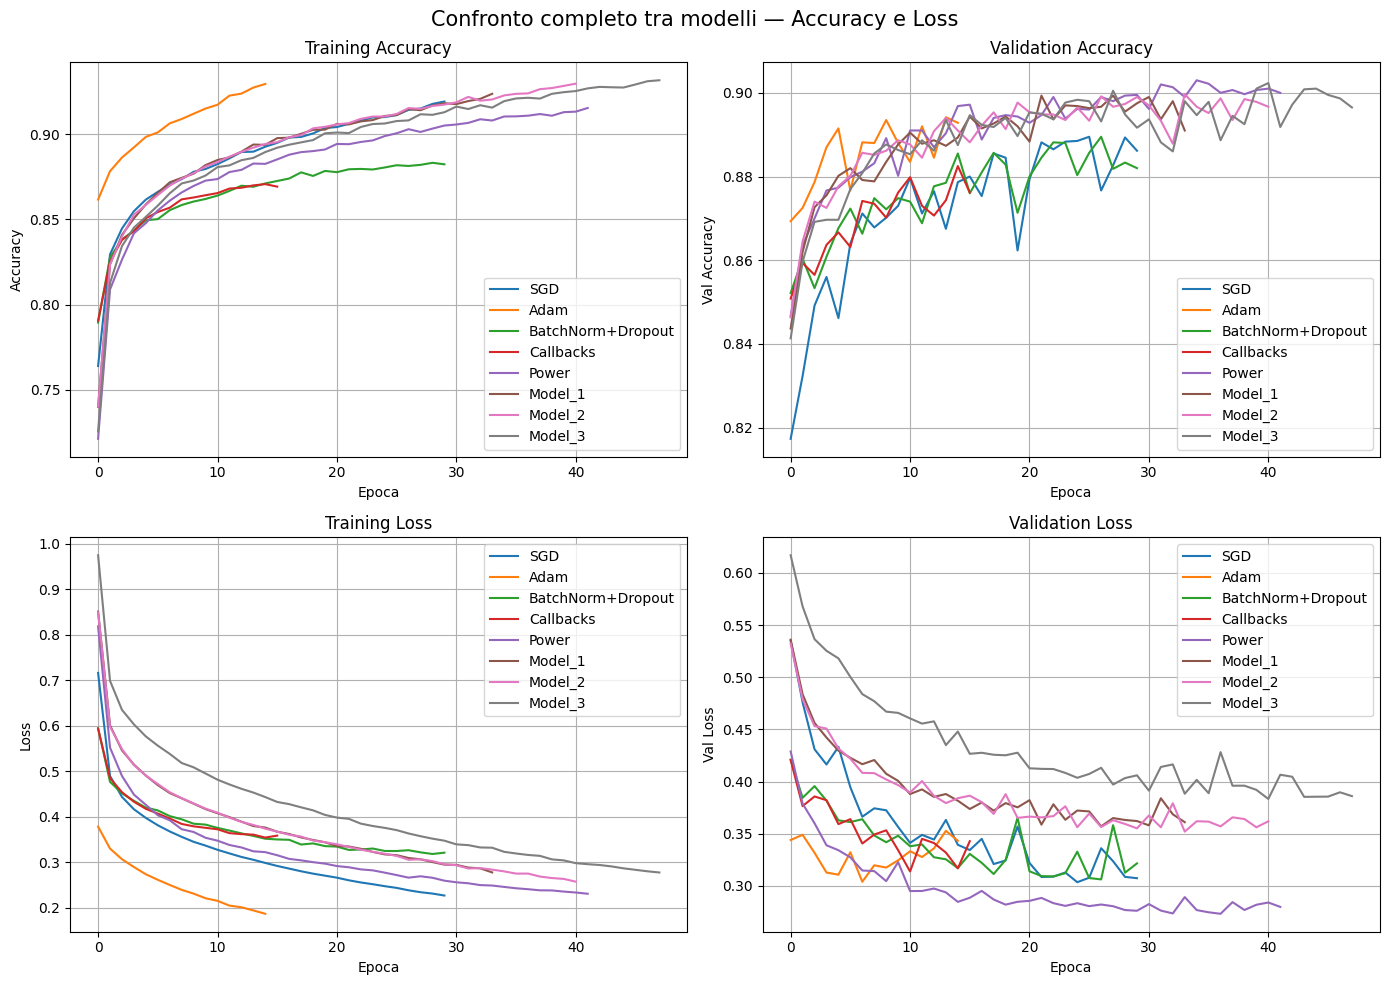

In [24]:


# Raccolta di tutte le history
Histories = {
    "SGD": history.history,
    "Adam": history_adam.history,
    "BatchNorm+Dropout": history_bn_do.history,
    "Callbacks": history_callbacks.history,
    "Power": history_power.history,
    "Model_1" : history_model_1.history,
    "Model_2" : history_model_2.history,
    "Model_3" : history_model_3.history
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1️⃣ Training Accuracy
for name, hist in Histories.items():
    axes[0,0].plot(hist["accuracy"], label=name)
axes[0,0].set_title("Training Accuracy")
axes[0,0].set_xlabel("Epoca")
axes[0,0].set_ylabel("Accuracy")
axes[0,0].grid(True)
axes[0,0].legend()

# 2️⃣ Validation Accuracy
for name, hist in Histories.items():
    axes[0,1].plot(hist["val_accuracy"], label=name)
axes[0,1].set_title("Validation Accuracy")
axes[0,1].set_xlabel("Epoca")
axes[0,1].set_ylabel("Val Accuracy")
axes[0,1].grid(True)
axes[0,1].legend()

# 3️⃣ Training Loss
for name, hist in Histories.items():
    axes[1,0].plot(hist["loss"], label=name)
axes[1,0].set_title("Training Loss")
axes[1,0].set_xlabel("Epoca")
axes[1,0].set_ylabel("Loss")
axes[1,0].grid(True)
axes[1,0].legend()

# 4️⃣ Validation Loss
for name, hist in Histories.items():
    axes[1,1].plot(hist["val_loss"], label=name)
axes[1,1].set_title("Validation Loss")
axes[1,1].set_xlabel("Epoca")
axes[1,1].set_ylabel("Val Loss")
axes[1,1].grid(True)
axes[1,1].legend()

plt.suptitle("Confronto completo tra modelli — Accuracy e Loss", fontsize=15)
plt.tight_layout()
plt.show()

In [25]:
# Carichiamo il modello salvato con i pesi migliori
best_power = keras.models.load_model("best_model.keras")

# Valutiamo sul test set
test_loss, test_acc = best_power.evaluate(X_test, y_test)
print(f"Loss sul test set: {test_loss:.4f}")
print(f"Accuratezza sul test set: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8924 - loss: 0.4121
Loss sul test set: 0.4121
Accuratezza sul test set: 0.8924
